In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import os
import numpy as np
import pandas as pd
from tqdm import tqdm
import chromATAC as ca
from chromATAC.integrated import IntData
from functools import reduce
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import matplotlib.colors as mcolors
from tqdm import tqdm
import warnings
import seaborn as sns
import matplotlib.gridspec as gridspec
from scipy.cluster import hierarchy

warnings.simplefilter("ignore", category=pd.errors.ParserWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)

In [6]:
parent_dir = '/Users/mossishahi/Code/lupien/IntData'

In [7]:
tes_dir = parent_dir+'/data/V2-TEs/non_olap'
cotes_dir = parent_dir+'/data/V2-TEs/non_olap/cores1000/'

In [8]:
TEs = np.array([i.split('.')[0] for i in os.listdir(tes_dir) if i.endswith('.bed')])
COTEs = np.array([i.split('.')[0] for i in os.listdir(cotes_dir) if i.endswith('.bed')])

In [12]:
te_meta = pd.read_csv(parent_dir+'/analysis/data/repeat_metadata.onlyTEs_full.tsv', sep='\t')
te_df = te_meta.iloc[np.concatenate([np.where(te_meta['repname_numbered'].apply(lambda x: i.split('_')[0]==x.split('_')[0]))[0] for i in TEs]), :].loc[:, ['repname', 'Superfamily', 'repname_numbered']].copy()
te_df.index = range(1, len(te_df)+1)
te_df['COTE'] = te_df['repname_numbered'].apply(lambda x: x.split('_')[0] in np.array([i.split('_')[0] for i in np.intersect1d(TEs, COTEs)]))
te_df.loc[971] = ['ERV3-16A3_I-int', 'ERVL', '369_ERV3-16A3_I-int', True]

In [13]:
te_n_elements = pd.read_csv(tes_dir+'/n_elements_per_TE.txt', sep='\t', header=None, names = ['name', 'n_elements'])
cote_n_elments = pd.read_csv(cotes_dir+'/n_clusters_per_TE.txt', sep='\t', header=None, names = ['name', 'n_clusters'])

In [14]:
te_n_elements['name'] = te_n_elements['name'].apply(lambda x: x.split('_Merged.bed')[0])
cote_n_elments['name'] = cote_n_elments['name'].apply(lambda x: x.split('_Merged.bed')[0])
te_df = te_df.merge(te_n_elements, how='left', left_on='repname_numbered', right_on='name').merge(cote_n_elments, how='left', left_on='repname_numbered', right_on='name').drop(['name_x', 'name_y'], axis=1).fillna(0)
te_df.set_index('repname_numbered', inplace=True)

-------

In [24]:
df.iloc[:, 54].sort_values(ascending=False)

CoTE
COTEs;COTEs>536_L1M5          1.277108
COTEs;COTEs>117_AluYf1        0.981481
COTEs;COTEs>568_L1MCa         0.963636
COTEs;COTEs>625_L1PA4         0.957831
COTEs;COTEs>532_L1M4a2        0.940828
                                ...   
COTEs;COTEs>618_L1PA14        0.000000
COTEs;COTEs>99_AluSq4         0.000000
COTEs;COTEs>902_MamRep1879    0.000000
COTEs;COTEs>1157_MLT1E2       0.000000
COTEs;COTEs>1367_THE1D-int    0.000000
Name: 54, Length: 453, dtype: float64

/Users/mossishahi/miniconda3/envs/shirin/lib/python3.12/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


<Figure size 1000x3000 with 0 Axes>

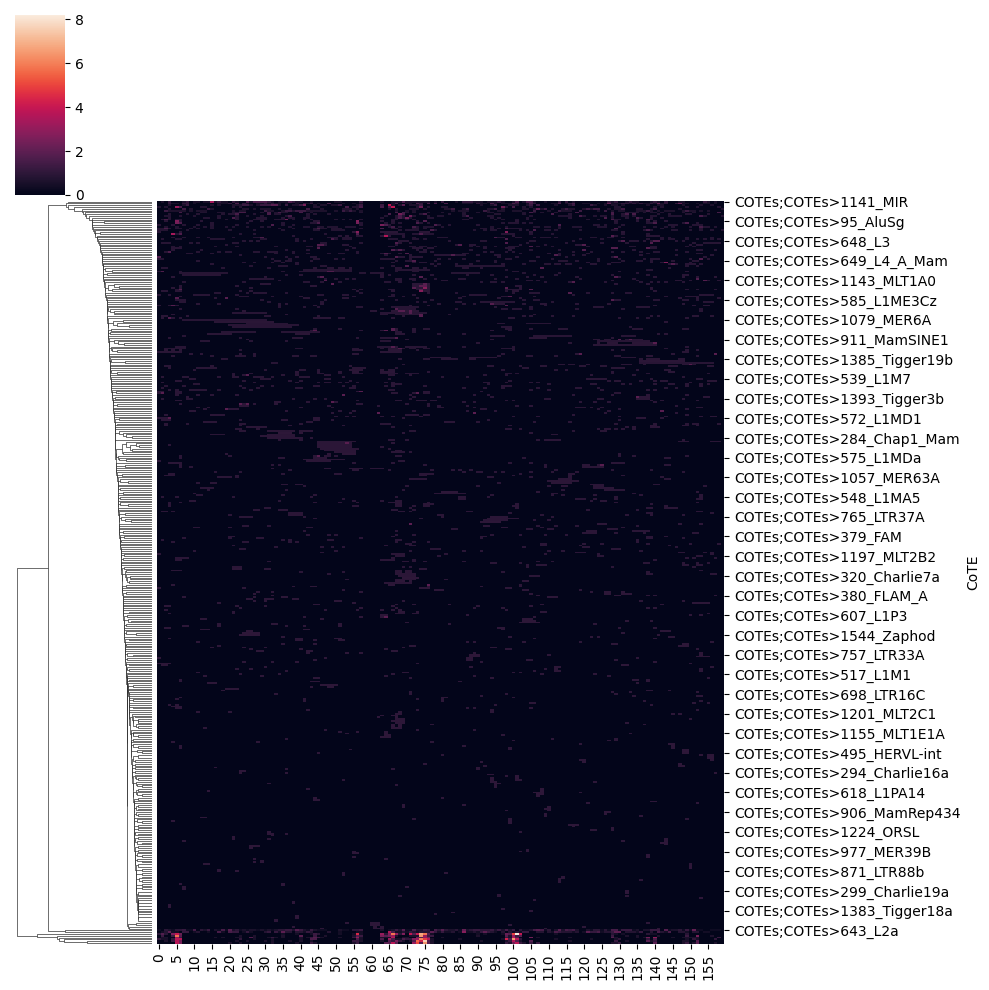

In [19]:
df = pd.read_csv(parent_dir+'/analysis/experiment14/loss/chr7__spcf_CoTE.csv', index_col=False)
df = df.rename(columns={'Unnamed: 0': 'CoTE'})
df = df.set_index('CoTE')
fig = plt.figure(figsize=(10, 30))
sns.clustermap(df[df.values.sum(-1)!=0], col_cluster=False)
plt.show()

/Users/mossishahi/miniconda3/envs/shirin/lib/python3.12/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


<Figure size 1000x3000 with 0 Axes>

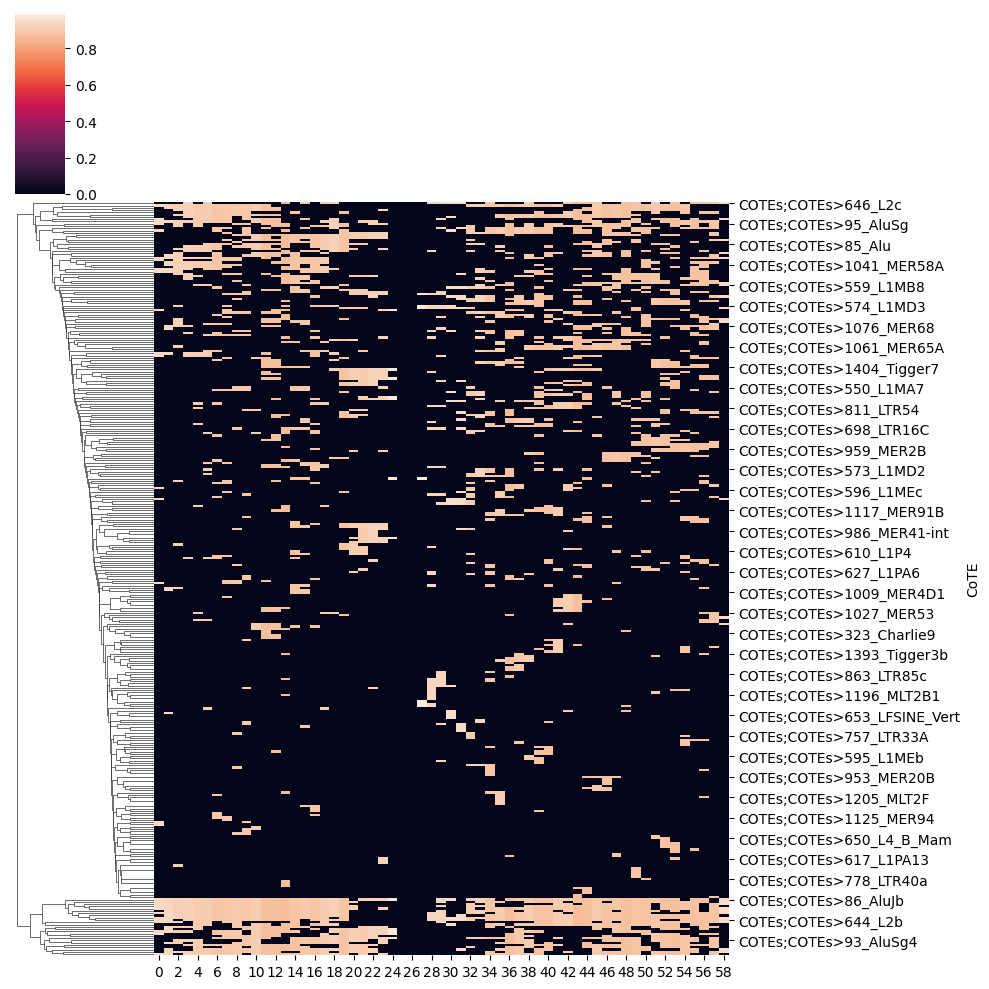

In [16]:
df = pd.read_csv(parent_dir+'/analysis/experiment11/loss/chr19__spcf_CoTE.csv', index_col=False)
df = df.rename(columns={'Unnamed: 0': 'CoTE'})
df = df.set_index('CoTE')
fig = plt.figure(figsize=(10, 30))
sns.clustermap(df[df.values.sum(-1)!=0], col_cluster=False)
plt.show()

/cluster/home/t124771uhn/miniconda3/envs/shirin/lib/python3.9/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


<Figure size 1000x3000 with 0 Axes>

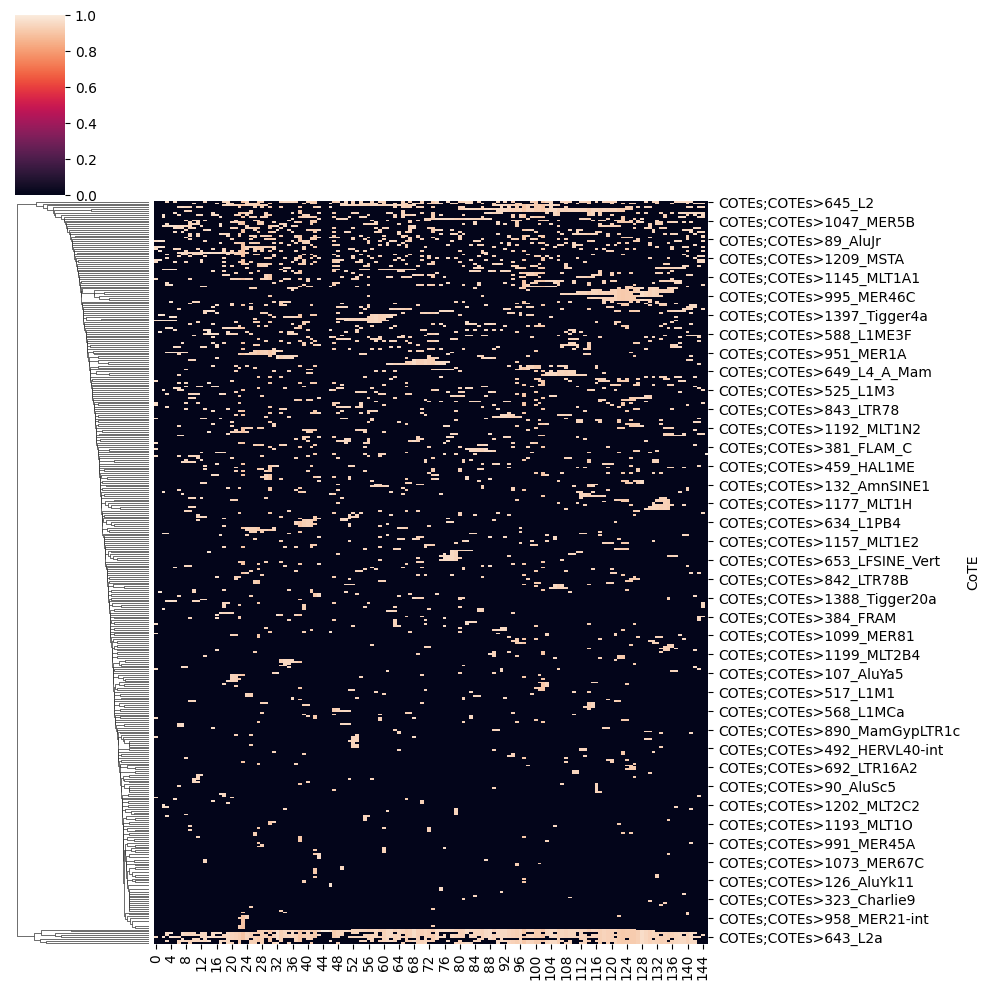

In [69]:
df = pd.read_csv('/cluster/home/t124771uhn/analysis/experiment11/loss/chr8__spcf_CoTE.csv', index_col=False)
df = df.rename(columns={'Unnamed: 0': 'CoTE'})
df = df.set_index('CoTE')
fig = plt.figure(figsize=(10, 30))
sns.clustermap(df[df.values.sum(-1)!=0], col_cluster=False)
plt.show()

/cluster/home/t124771uhn/miniconda3/envs/shirin/lib/python3.9/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


<Figure size 1000x3000 with 0 Axes>

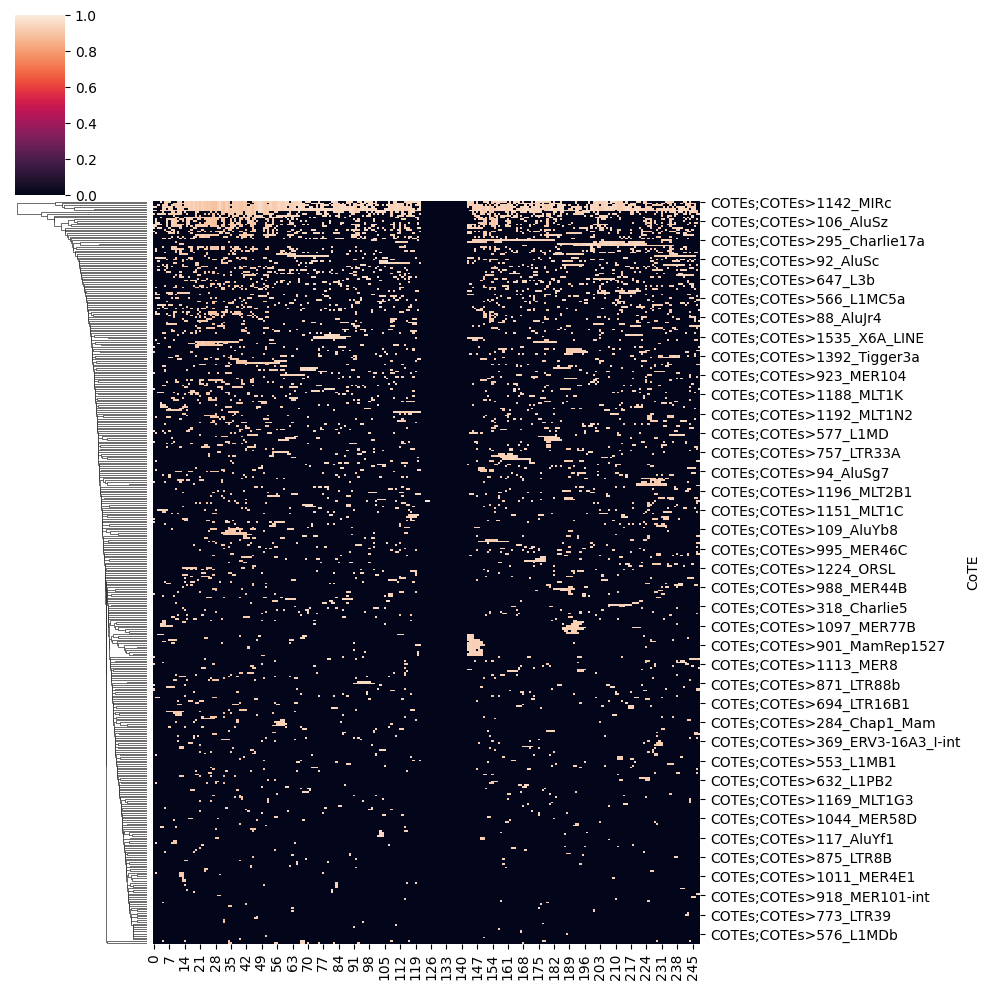

In [68]:
df = pd.read_csv('/cluster/home/t124771uhn/analysis/experiment11/loss/chr1__spcf_CoTE.csv', index_col=False)
df = df.rename(columns={'Unnamed: 0': 'CoTE'})
df = df.set_index('CoTE')
fig = plt.figure(figsize=(10, 30))
sns.clustermap(df[df.values.sum(-1)!=0], col_cluster=False)
plt.show()

/cluster/home/t124771uhn/miniconda3/envs/shirin/lib/python3.9/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


<Figure size 1000x3000 with 0 Axes>

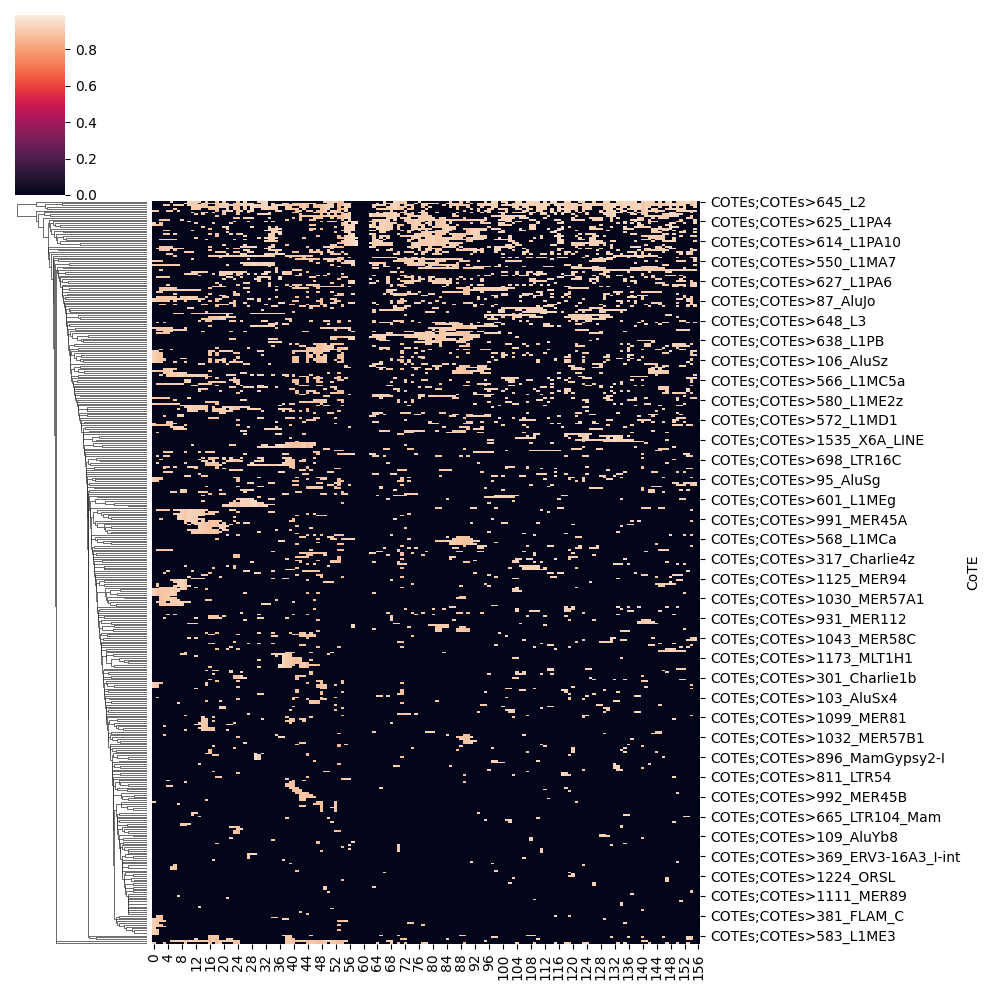

In [67]:
df = pd.read_csv('/cluster/home/t124771uhn/analysis/experiment11/loss/chrX__spcf_CoTE.csv', index_col=False)
df = df.rename(columns={'Unnamed: 0': 'CoTE'})
df = df.set_index('CoTE')
fig = plt.figure(figsize=(10, 30))
sns.clustermap(df[df.values.sum(-1)!=0], col_cluster=False)
plt.show()